In [1]:
# Counting the number of Facebook posts between March 10 and March 19 in Norway
# Facebook data were retrived using CrowdTangle 
# All code written i Jupyter notebook 

In [16]:
# Import library 
import pandas as pd 
import matplotlib.pyplot as plt

In [17]:
# Loading data 
facebook = pd.read_csv("facebook.csv")

In [18]:
# Explore the first 10 rows
facebook.head(10)

,Unnamed: 0,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,...,Link,Final Link,Image Text,Link Text,Description,Sponsor Id,Sponsor Name,Sponsor Category,Overperforming Score (weighted <U+2014> Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x ),file_name
0,1,Pernille Skipper,pernille.skipper.5,100044350213238,POLITICIAN,DK,Medlem af Folketinget for Enhedslisten,2007-08-27 09:44:34,76981.0,83179.0,...,https://www.facebook.com/photo.php?fbid=709744...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.54,NaN
1,2,Pernille Skipper,pernille.skipper.5,100044350213238,POLITICIAN,DK,Medlem af Folketinget for Enhedslisten,2007-08-27 09:44:34,76986.0,83185.0,...,https://www.facebook.com/photo.php?fbid=706976...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.42,NaN
2,3,Pernille Skipper,pernille.skipper.5,100044350213238,POLITICIAN,DK,Medlem af Folketinget for Enhedslisten,2007-08-27 09:44:34,76991.0,83198.0,...,https://www.facebook.com/photo.php?fbid=700580...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.55,NaN
3,4,Pernille Skipper,pernille.skipper.5,100044350213238,POLITICIAN,DK,Medlem af Folketinget for Enhedslisten,2007-08-27 09:44:34,76988.0,83202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.21,NaN
4,5,Pernille Skipper,pernille.skipper.5,100044350213238,POLITICIAN,DK,Medlem af Folketinget for Enhedslisten,2007-08-27 09:44:34,76992.0,83219.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.36,NaN
5,6,Pernille Skipper,pernille.skipper.5,100044350213238,POLITICIAN,DK,Medlem af Folketinget for Enhedslisten,2007-08-27 09:44:34,76999.0,83230.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.31,NaN
6,7,Pernille Skipper,pernille.skipper.5,100044350213238,POLITICIAN,DK,Medlem af Folketinget for Enhedslisten,2007-08-27 09:44:34,77001.0,83236.0,...,https://www.facebook.com/photo.php?fbid=689855...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94,NaN
7,8,Pernille Skipper,pernille.skipper.5,100044350213238,POLITICIAN,DK,Medlem af Folketinget for Enhedslisten,2007-08-27 09:44:34,77002.0,83237.0,...,https://www.facebook.com/photo.php?fbid=688760...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.09,NaN
8,9,Pernille Skipper,pernille.skipper.5,100044350213238,POLITICIAN,DK,Medlem af Folketinget for Enhedslisten,2007-08-27 09:44:34,77026.0,83265.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.49,NaN
9,10,Pernille Skipper,pernille.skipper.5,100044350213238,POLITICIAN,DK,Medlem af Folketinget for Enhedslisten,2007-08-27 09:44:34,77038.0,83284.0,...,https://www.facebook.com/photo.php?fbid=685554...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.81,NaN


In [43]:
# Processing variables 
facebook.columns = facebook.columns.str.lower()  # Converts column names to lowercase
facebook.columns = facebook.columns.str.replace(" ", "_")  # Replace spaces with _

# Filter the pandas dataframe to include only politicians from Norway 
politicians_facebook = facebook[facebook['page_category'] == 'POLITICIAN'] # Include only politicians from page_category

politicians_no = politicians_facebook[politicians_facebook["page_admin_top_country"] == "NO"] # Include only Norway

# Covert to datetime format 
politicians_no['post_created_date'] = pd.to_datetime(politicians_no['post_created_date'], errors = 'coerce')

# Check if 'post_created_date' is a date column
if politicians_no['post_created_date'].isna().any():
    print("The 'post_created_date' column is not entirely a date column.")
else:
    print("The 'post_created_date' column is a date column.")

# Drop rows with missing dates
politicians_no = politicians_no.dropna(subset=['post_created_date'])

# Group by day and count the number of posts
politicians_no_post_count = politicians_no.groupby(politicians_no['post_created_date'].dt.date).size().reset_index(name='post_count')

The 'post_created_date' column is a date column.


C:\Users\roja006\AppData\Local\Temp\ipykernel_15768\3851184602.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  politicians_no['post_created_date'] = pd.to_datetime(politicians_no['post_created_date'], errors = 'coerce')


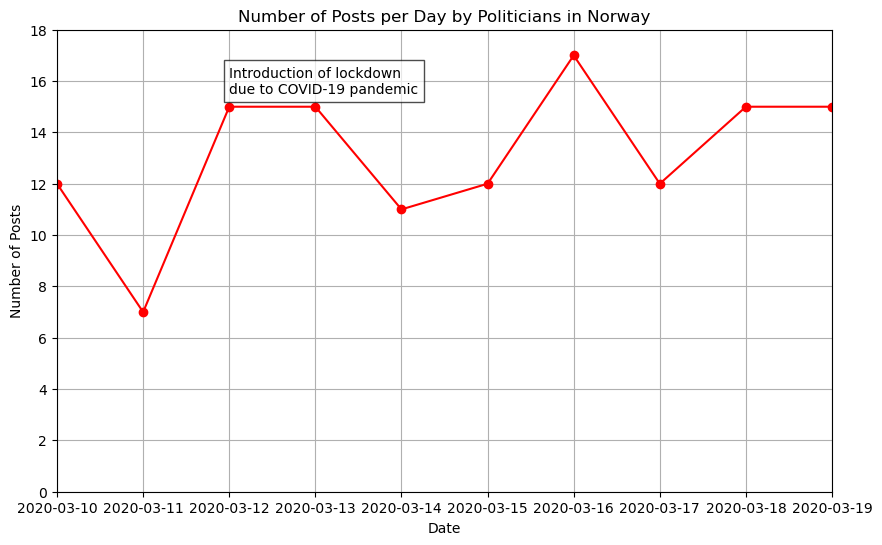

In [44]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(politicians_no_post_count['post_created_date'], politicians_no_post_count['post_count'], marker='o', linestyle='-', color='red')
plt.title('Number of Posts per Day by Politicians in Norway')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.grid(True)

# Set y-axis limits
plt.ylim(0, 18)

# Set x-axis limits for better visualization
plt.xlim(pd.Timestamp('2020-03-10'), pd.Timestamp('2020-03-19'))

# Add a text box
plt.text(pd.Timestamp('2020-03-12'), 16, "Introduction of lockdown\ndue to COVID-19 pandemic", fontsize=10, ha='left', va='center', bbox=dict(facecolor='white', alpha=0.7))

plt.show()